In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls

README.md         explorer.ipynb    shampoo-sales.csv some_data.csv


In [3]:
raw_df = pd.read_csv("shampoo-sales.csv")
raw_df.head(5)

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [4]:
raw_df = raw_df.sort_values(
    by="Month",
    ascending=True
)

raw_df

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [5]:
raw_df.columns = [
    "_".join(each.lower().split())for each in raw_df.columns
]

raw_df

,month,sales_of_shampoo_over_a_three_year_period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


Some good models include:
- **EWMA (Holt-Winters) from statsmodels**
- ARIMA (and SARIMA, optional) from statsmodels as well
- Use feature engineering to create a tree-based forecaster (Gradient Boosting Regressor from sklearn). the features you would use are lags.
- You can use the facebook prophet package to achieve the same

### homework
1. If you can make ARIMA or prophet work, would be great for a fruitful session #2
2. Try using flask to deploy on your machine

### Exponential Smoothing

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [7]:
train_df = raw_df[:-1].copy()

train_df

,month,sales_of_shampoo_over_a_three_year_period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


#### To generate forecasts for JANUARY 2021, make sure your dataset has data up until 31/12/2020

IN your task:
Forecast
    - filter out data from raw_df
    - Category 'Alkohounfaelle'
    - Type 'ingesamt'
    - Year '2021'
    - Month '01
    
#### Then Filter
- Category 'Alkohounfaelle'
- Type 'ingesamt'

-> train_df

In [8]:
# pass "predictor" series of train_df to function
model = ExponentialSmoothing(
    train_df.sales_of_shampoo_over_a_three_year_period
).fit()

#### To generate forecasts simply ask pass how many steps to the model
1 month = 31 days = 31 steps

In [9]:
model.forecast(steps=3)

36    583.696308
37    583.696308
38    583.696308
dtype: float64

## Actual Data

In [10]:
!ls

README.md         explorer.ipynb    shampoo-sales.csv some_data.csv


In [11]:
eda_df = pd.read_csv(
    "some_data.csv"
)

eda_df.columns = [each.lower() for each in eda_df.columns]

In [12]:
# we filter for the category and type as requested by task
# we exclude 2021 data, since we are going to forecast for month 01/2021
# in the data there also exist yearly sums, we will exclude these

train_df = eda_df[
    (eda_df.monatszahl == "Alkoholunfälle") &
    (eda_df.auspraegung == "insgesamt") &
    (eda_df.jahr != 2021) &
    (eda_df.monat != "Summe")
].copy().sort_values(
    by="monat"
).reset_index(drop=True)

train_df

,monatszahl,auspraegung,jahr,monat,wert,vorjahreswert,veraend_vormonat_prozent,veraend_vorjahresmonat_prozent,zwoelf_monate_mittelwert
0,Alkoholunfälle,insgesamt,2000,200001,78.0,NaN,NaN,NaN,78.0
1,Alkoholunfälle,insgesamt,2000,200002,53.0,NaN,-32.05,NaN,66.0
2,Alkoholunfälle,insgesamt,2000,200003,73.0,NaN,37.74,NaN,68.0
3,Alkoholunfälle,insgesamt,2000,200004,78.0,NaN,6.85,NaN,71.0
4,Alkoholunfälle,insgesamt,2000,200005,96.0,NaN,23.08,NaN,76.0
...,...,...,...,...,...,...,...,...,...
247,Alkoholunfälle,insgesamt,2020,202008,46.0,31.0,-20.69,48.39,39.0
248,Alkoholunfälle,insgesamt,2020,202009,46.0,47.0,0.00,-2.13,39.0
249,Alkoholunfälle,insgesamt,2020,202010,34.0,45.0,-26.09,-24.44,38.0
250,Alkoholunfälle,insgesamt,2020,202011,23.0,29.0,-32.35,-20.69,38.0


### visualizing

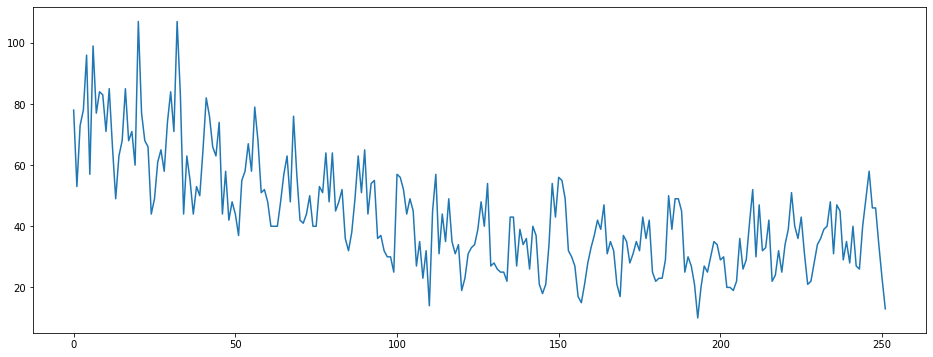

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(16,6))
plt.plot(train_df.wert)
plt.show()

In [14]:
# the predictor field might be "wert"

model = ExponentialSmoothing(
    train_df.wert,
    seasonal_periods=12,
    trend="add",
    seasonal="mul"
).fit()

# model.summary()

In [15]:
my_result = model.forecast(steps=12).values
my_result

array([24.98875465, 25.56254819, 29.60561037, 32.21078654, 40.06716546,
       40.01903319, 48.37663907, 39.07721516, 46.00320252, 37.30134008,
       31.54592707, 32.58242843])

**Input**

```json
{
    "year": 2021,
    "month": 10
}
```

```python
ind = input_json["month"] # == 10
return my_result[ind-1]
```

In [16]:
my_result[9]

37.30134007673905

### deployment
[How to Deploy Machine Learning Models using Flask (with Code!)](https://www.analyticsvidhya.com/blog/2020/04/how-to-deploy-machine-learning-model-flask/)

#### Note:
- You have been asked specifically to support the POST method
```python
@app.route('/', methods=['POST'])
```

### My version of pmdarima 
```bash
Name: pmdarima
Version: 1.8.0
Summary: Python's forecast::auto.arima equivalent
Home-page: http://alkaline-ml.com/pmdarima
Author: 
Author-email: 
License: MIT
Location: /Users/valiant/forge/.env/lib/python3.8/site-packages
Requires: Cython, joblib, numpy, pandas, scikit-learn, scipy, setuptools, statsmodels, urllib3
```

In [20]:
!pip install pmdarima==1.8.0